THIS NOTEBOOK PRODUCES THE KINEMATIC MAPS AND RGB IMAGES AND SAVES THEM INTO A PDF FILE 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import BoundaryNorm
from astropy.table import Table
from astropy.io import fits
from matplotlib import ticker
from pathlib import Path
import os
from matplotlib.backends.backend_pdf import PdfPages
import math
import matplotlib.image as mpimg
from astropy.visualization import make_lupton_rgb
from astropy.visualization import SqrtStretch
from astropy.visualization import ZScaleInterval
import glob

In [2]:
tablename = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\jvds_stelkin_cat_v012_mge_seecorr_kh20_v150121_private-Copy1.fits'
cat = Table.read(tablename, hdu=1)

# make an array for each important dataset
CATID = cat.field('CATID')
KIN_MTYPE = cat.field('KIN_MTYPE')
FILENAME = cat.field('SAMI_FILENAME')
CATID_EXT = cat.field('CATID_EXT')
LMSTAR = cat.field('LMSTAR')
RE_CIRC_KPC = cat.field('RE_CIRC_KPC')
SIGMA_RE = cat.field('SIGMA_RE')

In [3]:
MSOLAR = 1.98892e30
G = 6.67300e-11
kpctom = 3.08568025e19

def SIGMA_STAR_CALC(LMSTAR_VAL, RE_CIRC_VAL):
    return math.sqrt(((10**LMSTAR_VAL)*MSOLAR*G)/(RE_CIRC_VAL*kpctom*5))/(1e3)

SIGMA_STAR = []
for i in range(LMSTAR.size):
    SIGMA_STAR += [SIGMA_STAR_CALC(LMSTAR[i],RE_CIRC_KPC[i])]
    
SIGMA_STAR = np.array(SIGMA_STAR)

NANS_SIGMA_RE = np.argwhere(np.isnan(SIGMA_RE))
SIGMA_STAR_1 = SIGMA_STAR[NANS_SIGMA_RE]
SIGMA_RE[NANS_SIGMA_RE] = SIGMA_STAR_1

In [9]:
CATID_6 = [16294,      49728,      54102,      98652,     106065,
           178585,     186833,     197843,     209414,     210808,
           210909,     221194,     238072,     278643,     319139,
           321207,     325001,     460424,     517802,     536994,
           550677,     594964, 9011900407, 9239900248, 9388000397,
       9403800001]

In [72]:
CATID_EXT6 = [        16294, 2000000049728,         54102,         98652,
              106065,        178585,        186833,        197843,
              209414,        210808,        210909,        221194,
              238072,        278643, 1000000319139,        321207,
              325001,        460424,        517802,        536994,
              550677,        594964,    9011900407,    9239900248,
          9388000397,    9403800001]

In [4]:
CATID_8 = [601283,
 220465,
 9011900152,
 70640,
 9239900540,
 378104,
 9011900024,
 9044200148,
 70802,
 203833,
 9239900108,
 9403800833,
 48681,
 9011900365,
 93020]

In [4]:
CATID_12 = [    229097,     278703,     347571,     496978, 9008500185,
       9011900752, 9239900567]

In [5]:
CATID_12 = [718921,
9011900060,
9011900086,
1009011900086,
9011900210]

In [51]:
CATID_7 = [143291, 230776]

In [4]:
CATID_12 = [16022,
 54270,
 70022,
 92592,
 93020,
 93803,
 185567,
 205161,
 230776,
 238131,
 323242,
 378104,
 380578,
 383147,
 561488,
 9011900152,
 9011900547,
 9239900248,
 9388000001,
 9388000068]

In [4]:
CATID_12 = [     36880,      70929,      77754,     106717,     106908,
           144402,     220326,     227607,     238221,     301201,
           302810,     319385,     346842,     382731,     491508,
           497035,     509012,     583427, 9239900009, 9403800397,
       9403800690, 9403801088, 9403801183, 9403801268]

In [4]:
CATID_12 = [     53770,      69620,     107454,     177081,     229097,
           230719,     230787,     278643,     278703,     321146,
           422289,     496978, 9008500185, 9008500805, 9011900113,
       9011900392, 9011900752, 9011900785, 9016800038, 9239900038,
       9403800272]

In [4]:
CATID_12 = [9239900567]

In [4]:
CATID_12 = [347571]

In [13]:
cat_use = CATID_12
sigma_re_vals = []
for i in range(np.size(cat_use)):
    a  = np.where(cat_use[i] == CATID_EXT)
    idx = a[0][0]
    print('INDEX: ', idx)
    sigma_re = SIGMA_RE[idx]
    sigma_re_vals.append(sigma_re)
    print('SIGMA_RE:', sigma_re)

INDEX:  1002
SIGMA_RE: 61.122746
INDEX:  1464
SIGMA_RE: 68.454216
INDEX:  2505
SIGMA_RE: 63.985767
INDEX:  2671
SIGMA_RE: 67.60549
INDEX:  3062
SIGMA_RE: 70.27454
INDEX:  3163
SIGMA_RE: 72.846725


In [6]:
SDSS_IMAGE_FILES = glob.glob('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\02_sdss_clusters\\*.fits')

In [11]:
# from zipfile import ZipFile 

# path = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments\\'
# # specifying the zip file name 
# file_name = "kids_imaging.zip"
  
# # opening the zip file in READ mode 
# with ZipFile(path + file_name, 'r') as zip: 
#     # printing all the contents of the zip file 
# #     zip.printdir() 
  
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 
#     print('Done!') 

In [16]:
# SAMI_FITS = glob.glob("C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments\\*.fits")

In [7]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = [25,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"text.usetex": False})
plt.rcParams.update({'font.size': 14})

In [8]:
CATID_12

[9239900567]

In [8]:
# %%time
# #Open slices and select good quality spaxels by applying limits (ignore errors)#

# ##use this script to print all images of galaxies in one pdf, make loops of 5 or 10 per page for ease
# pp = PdfPages('multipage_attempt38.pdf')

# for i in range(0,np.size(CATID_TO_RUN)):

#     catid_use = str(CATID_TO_RUN[i])
#     if catid_use == '209613':
#         continue
#     sami_file_name = FILENAME[i]  
#     s = str(sami_file_name)
#     s = s.strip()
#     num = s.find('_')
#     l = len(s)
#     s = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments\\' + \
#     s[:num] + '_blue_red' + s[num:l-8] + '_kinematicsM2'+ s[l-8:-3]
#     filename = s

# for a in range (0,3430):
#     os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments')
#     data_folder = Path()
#     file_to_open = data_folder / SAMI_FITS[a]
#     hdul = fits.open(file_to_open)
#     FLUX = hdul[1].data
#     VMAP = hdul[3].data
#     VEL_ERR = hdul[4].data
#     SIG = hdul[5].data
#     SIG_ERR = hdul[6].data    
#     QC = hdul[8].data
#     SNR = QC[:,:,3]
#     FLUX_GOOD = np.swapaxes(FLUX,0,1)

    
#     a = np.where((VEL_ERR <= 30) & (SNR >= 3) & (SIG_ERR < SIG*0.1 +25), 1, np.NaN)
#     vel = np.multiply(VMAP,a)
#     sig = np.multiply(SIG,a)
    
#     VMAP_CENTRE = vel[23:26,23:26]
#     MEDIAN = np.nanmedian(VMAP_CENTRE)
#     vel = vel - MEDIAN
    
#     CATID1 = int(hdul[0].header[14])
#     if CATID not in CATID_3:
#         continue
# #     x = np.where(CATID == CATID1)
#     x = np.where(CATID == CATID1)
#     y = np.nanmax(x)
#     SIGMA_SCALE = SIGMA_RE[y]
    
#     if np.isnan(SIGMA_SCALE) == True:
#         SIGMA_SCALE = np.nanpercentile(VMAP_GOOD,95)
#     else:
#         SIGMA_SCALE = SIGMA_SCALE
    
#     fig, axs = plt.subplots(1,5)
#     fig.suptitle('Galaxy ID:' + str(CATID1) , fontsize=16)
    
# #     Add an if statement and unzip the file with a similar file name setup
    
#     img_file_name = 'kids_imaging/' + str(CATID1) + '_rgb.png'
    
#     fits_file_name = str(CATID1) + '_sdss_60.fits'
    
#     #Add a try except block or similar in here to generate image from correct source
    
#     if CATID1 < 4e6:
    
#         try:
#             with ZipFile('kids_imaging.zip') as myzip:
#                 with myzip.open(img_file_name) as myfile:
#                     img = mpimg.imread(img_file_name)
#                     img = img[75:225,75:225]
#         except:
#             img = mpimg.imread('No_image_available.png')
            
#     else:
#         try:
#             os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\02_sdss_clusters')
#             hdul_img = fits.open(fits_file_name)
            
#             forCasting = np.float_()

#             g = hdul_img[1].data
#             r = hdul_img[2].data
#             i = hdul_img[3].data
            
#             g = np.array(g,forCasting)
#             r = np.array(r,forCasting)
#             i = np.array(i,forCasting)

#             g = g[0:152, 0:152]
#             r = r[0:152, 0:152]
#             i = i[0:152, 0:152]

#             g = g[38:114, 38:114]
#             r = r[38:114, 38:114]
#             i = i[38:114, 38:114]

#             stretch = SqrtStretch() 

#             g = stretch(g)
#             r = stretch(r)
#             i = stretch(i)

#             rgb_default = make_lupton_rgb(i ,r ,g, Q= 1, stretch = 1)
# #             img = np.swapaxes(rgb_default,0,1)
#             img = rgb_default
                  
#         except:
#             img = mpimg.imread('No_image_available.png')
    
#     ab = np.shape(img)
#     inc = round(ab[0]/6)
    
#     I = axs[0].imshow(img)
#     axs[0].set_title('RGB Image', fontsize = 16)
#     axs[0].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
#     axs[0].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
#     axs[0].set_aspect('equal', 'box')
#     axs[0].set_facecolor('xkcd:light grey')
#     axs[0].set_xticks([inc,2*inc,3*inc,4*inc,5*inc])
#     axs[0].set_xticklabels([-10, -5, 0, 5, 10])
#     axs[0].set_yticks([inc,2*inc,3*inc,4*inc,5*inc])
#     axs[0].set_yticklabels([-10, -5, 0, 5, 10])
#     axs[0].tick_params(direction = 'in')
   
#     F = axs[1].pcolor(FLUX, cmap = 'gray')
#     axs[1].set_title('Flux', fontsize = 16)
#     axs[1].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
#     axs[1].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
#     fig.colorbar(F, ax=axs[1], fraction=0.046, pad=0.04)
#     axs[1].set_aspect('equal', 'box')
#     axs[1].set_facecolor('xkcd:light grey')
#     axs[1].set_xticks([10, 25, 40])
#     axs[1].set_xticklabels([5, 0, -5])
#     axs[1].set_yticks([10, 25, 40])
#     axs[1].set_yticklabels([5, 0, -5])
#     axs[1].tick_params(direction = 'in')
    
#     D = axs[2].pcolor(vel, cmap= 'RdYlBu_r', vmax = SIGMA_SCALE, vmin = -SIGMA_SCALE)
#     axs[2].set_title('V [Km/s] (Sigma Scale)', fontsize = 16)
#     axs[2].set_xlabel('RA offset (arcsec)', fontsize = 14)
#     axs[2].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
#     fig.colorbar(D, ax=axs[2], fraction=0.046, pad=0.04)
#     axs[2].set_aspect('equal', 'box')
#     axs[2].set_facecolor('xkcd:light grey')
#     axs[2].set_xticks([10, 25, 40])
#     axs[2].set_xticklabels([5, 0, -5])
#     axs[2].set_yticks([10, 25, 40])
#     axs[2].set_yticklabels([5, 0, -5])
#     axs[2].tick_params(direction = 'in')
    
#     D2 = axs[3].pcolor(vel, cmap= 'RdYlBu_r', vmax = np.nanpercentile(vel,95),
#                        vmin = np.nanpercentile(vel,5))
#     axs[3].set_title('V [Km/s] (Auto-scale)', fontsize = 16)
#     axs[3].set_xlabel('RA offset (arcsec)', fontsize = 14)
#     axs[3].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
#     fig.colorbar(D2, ax=axs[3], fraction=0.046, pad=0.04)
#     axs[3].set_aspect('equal', 'box')
#     axs[3].set_facecolor('xkcd:light grey')
#     axs[3].set_xticks([10, 25, 40])
#     axs[3].set_xticklabels([5, 0, -5])
#     axs[3].set_yticks([10, 25, 40])
#     axs[3].set_yticklabels([5, 0, -5])
#     axs[3].tick_params(direction = 'in')

#     V = axs[4].pcolor(sig, cmap= 'YlOrRd', vmin = np.nanpercentile(sig, 5), vmax = np.nanpercentile(sig, 95))
#     axs[4].set_title('Sigma [Km/s] (Auto-scale)', fontsize = 16)
#     axs[4].set_xlabel('RA offset (arcsec)', fontsize = 14)
#     axs[4].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
#     axs[4].set_aspect('equal', 'box')
#     fig.colorbar(V, ax=axs[4], fraction=0.046, pad=0.04)
#     axs[4].set_facecolor('xkcd:light grey')
#     axs[4].set_xticks([10, 25, 40])
#     axs[4].set_xticklabels([5, 0, -5])
#     axs[4].set_yticks([10, 25, 40])
#     axs[4].set_yticklabels([5, 0, -5])
#     axs[4].tick_params(direction = 'in')
    
#     plt.tight_layout()
#     os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project')
#     pp.savefig()
    
# pp.close()


In [91]:
CATID_EXT8 = [     54102,     221194,     238072,     278643,     536994,
       9011900407, 9239900248, 9388000397, 9403800001]

In [109]:
CATID_EXT9 = [      7992,      16022,      65408,      65410,      93020,
            93803,     228708,     230776,     272190,     279910,
           287692,     300787,     372452,     380734,     382154,
           382563,     543895,     622350,     663440,    3631885,
       9011900254, 9011900590, 9016800010, 9016800303, 9044200175,
       9091700733, 9239900020, 9239901001, 9388000124, 9388000195,
       9388000489, 9403800023, 9403800045, 9403800086, 9403800763]

In [12]:
CATID_10 = [70022,
 517205,
 278846,
 371172,
 373168,
 9388000195,
 325467,
 378104,
 9239900020,
 39057,
 70802,
 186012,
 9403800833,
 9016800038,
 570114,
 9011900365,
 9008500314,
 9388000489,
 9016800231,
 9011900152,
 93020,
 9388000068]

In [13]:
CATID_12 = [     14812,      16242,      16926,      30346,     144402,
           288851,     297633,     372599,     504730,     551507,
           592216, 9008500145, 9008500158, 9008500166, 9008500209,
       9008500246, 9008500951, 9011900038, 9011900048, 9011900242,
       9011900614, 9016800061, 9091700062, 9239900354, 9388000006,
       9388000437, 9403800256, 9403800315]

In [20]:
CATID_12 = [    227230,     229097,     347571,     585359, 9008500185,
       9239900337]

In [12]:
CATID_12 = [    278703,     496978, 9239900567]

In [12]:
CATID_12 = [    229097,     347571, 9008500185, 9011900113, 9239900038,
       9239900567]

In [14]:
CATID_TO_RUN = CATID_12

In [15]:
sigma_re_vals

[61.122746, 68.454216, 63.985767, 67.60549, 70.27454, 72.846725]

In [16]:
os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project')

not in kids, trying sdss
not in kids, trying sdss
not in kids, trying sdss
not in kids, trying sdss


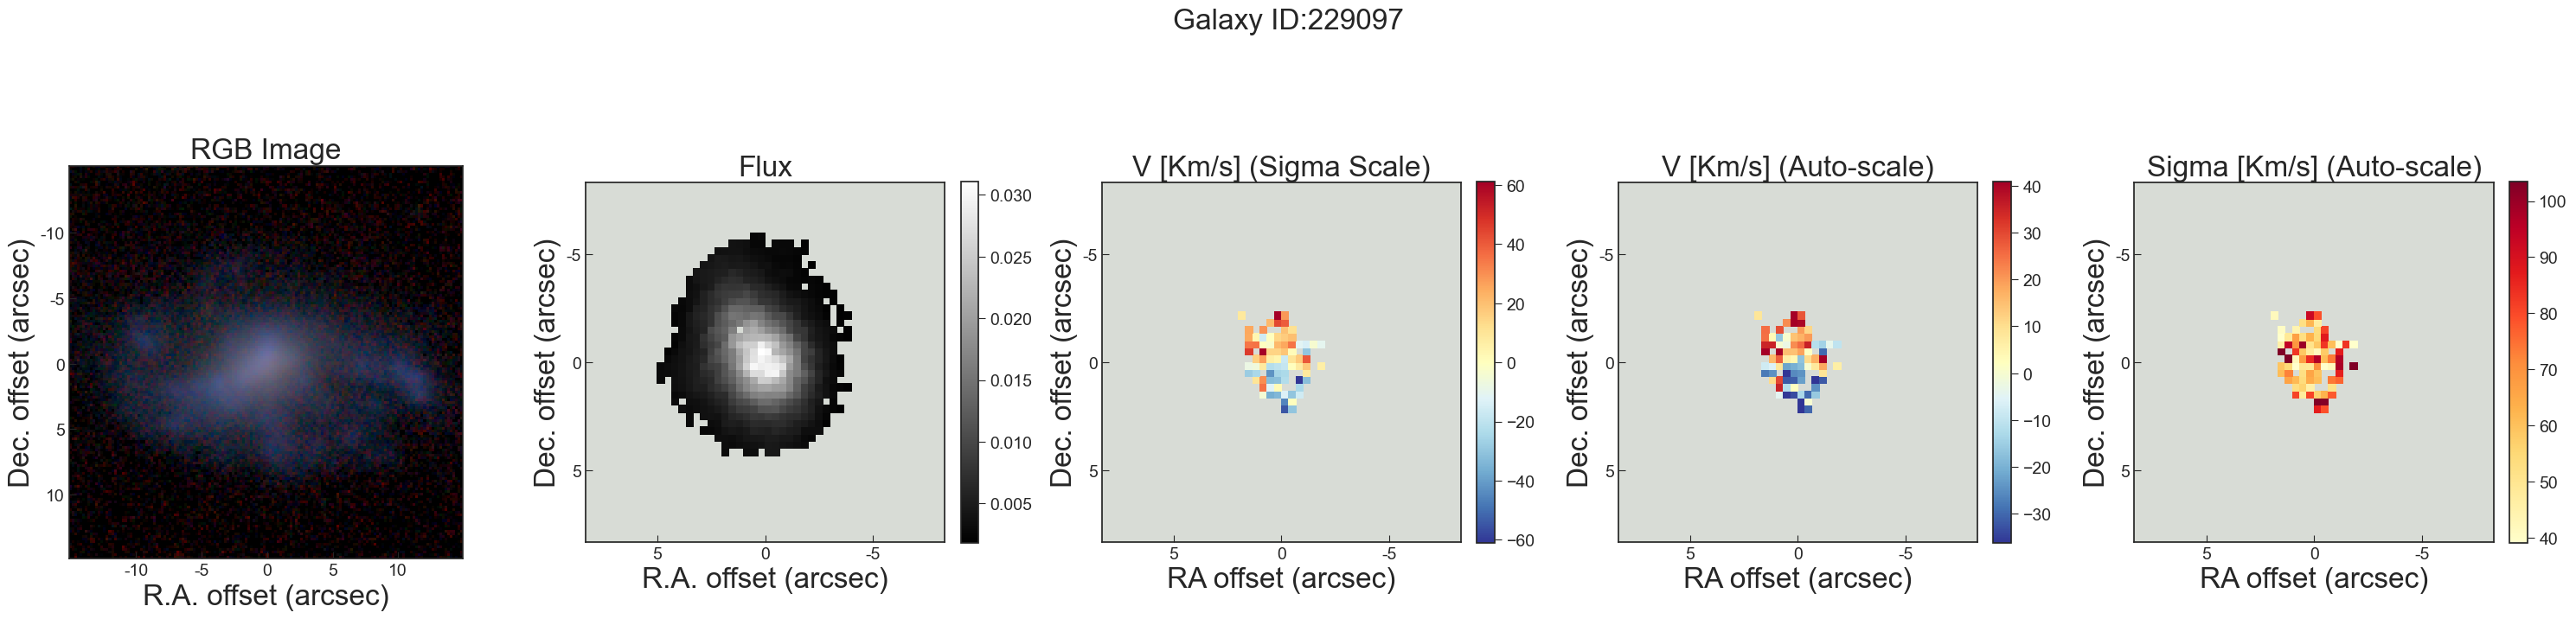

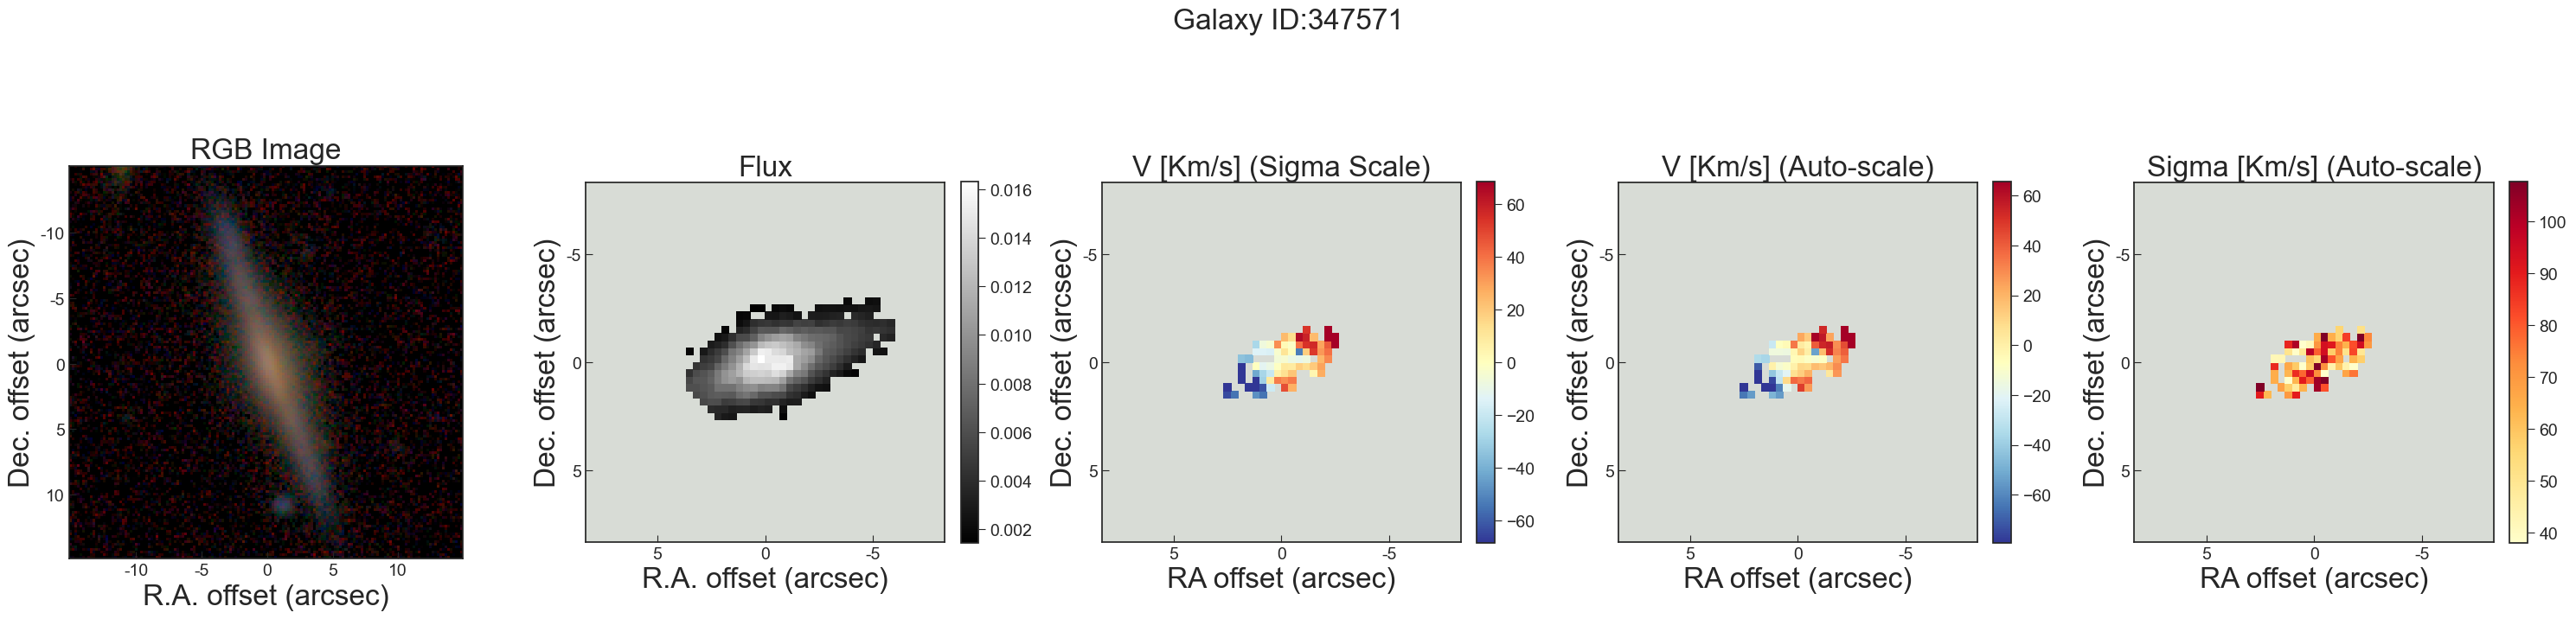

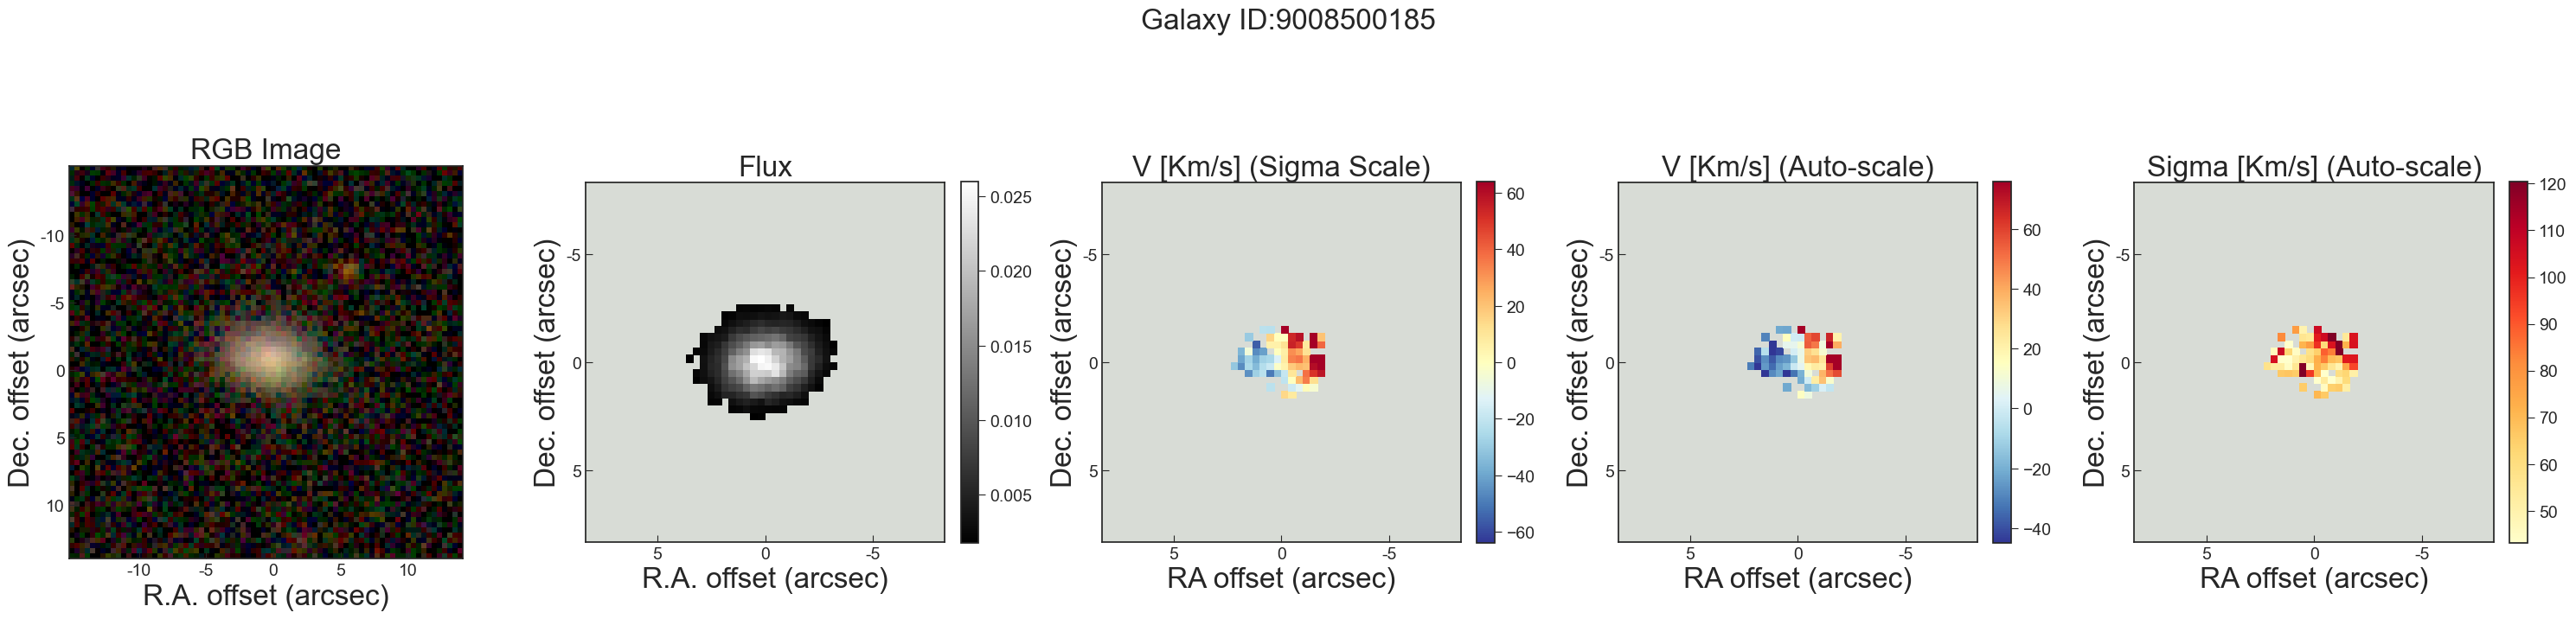

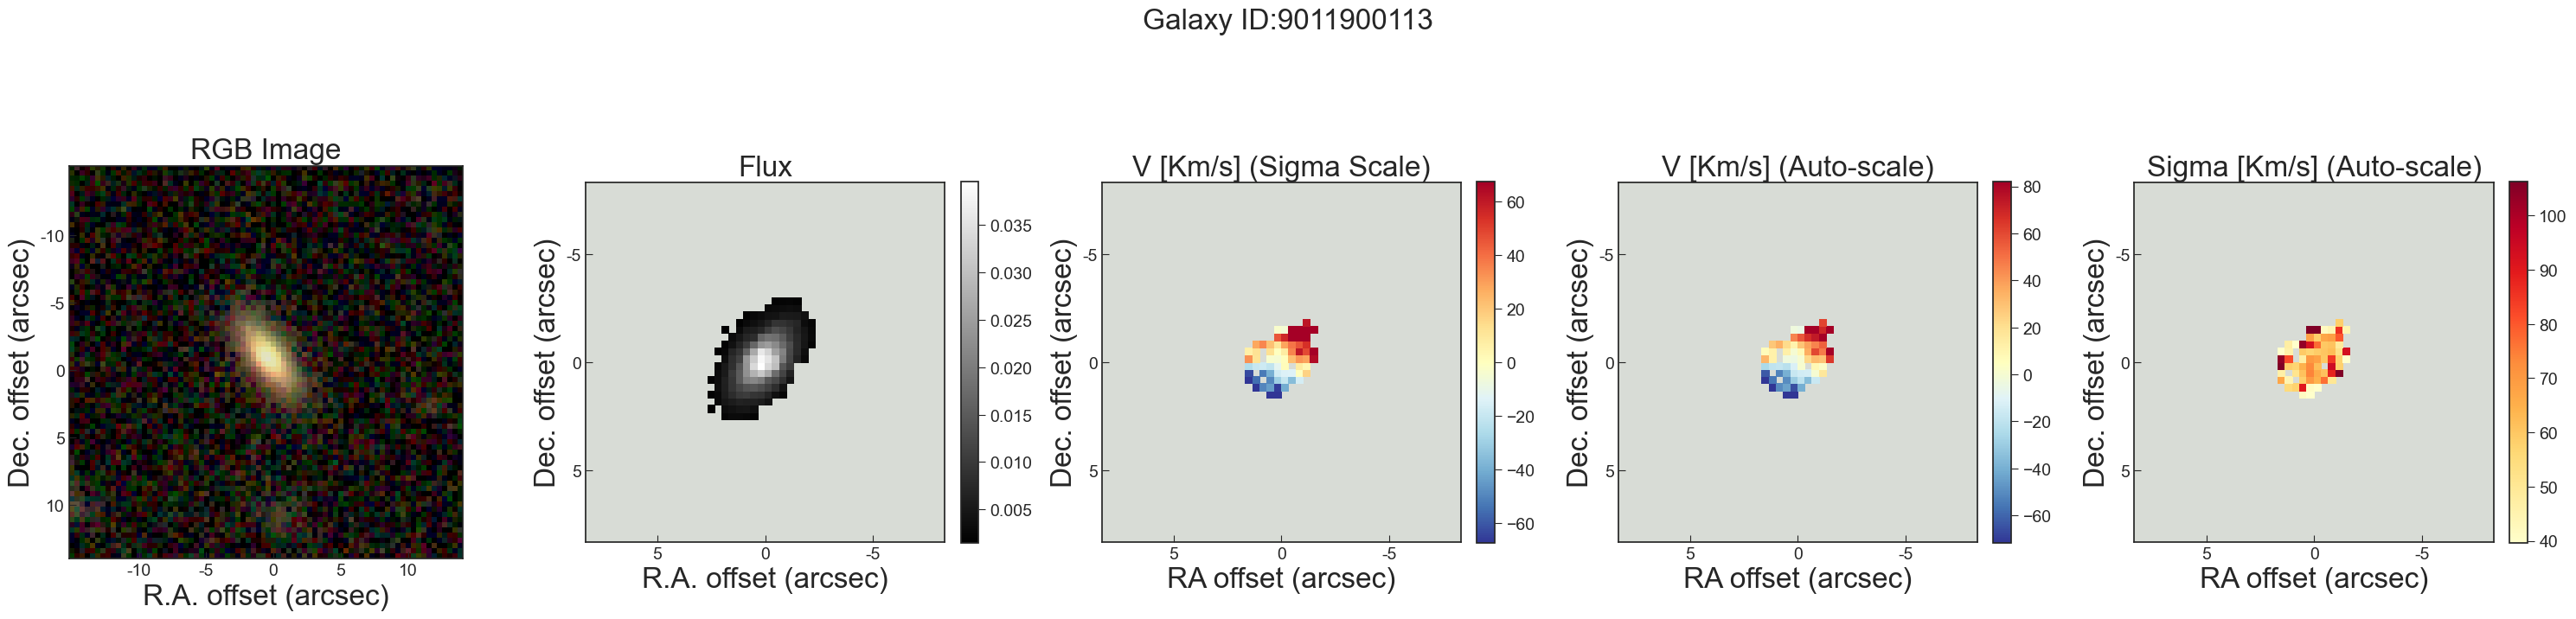

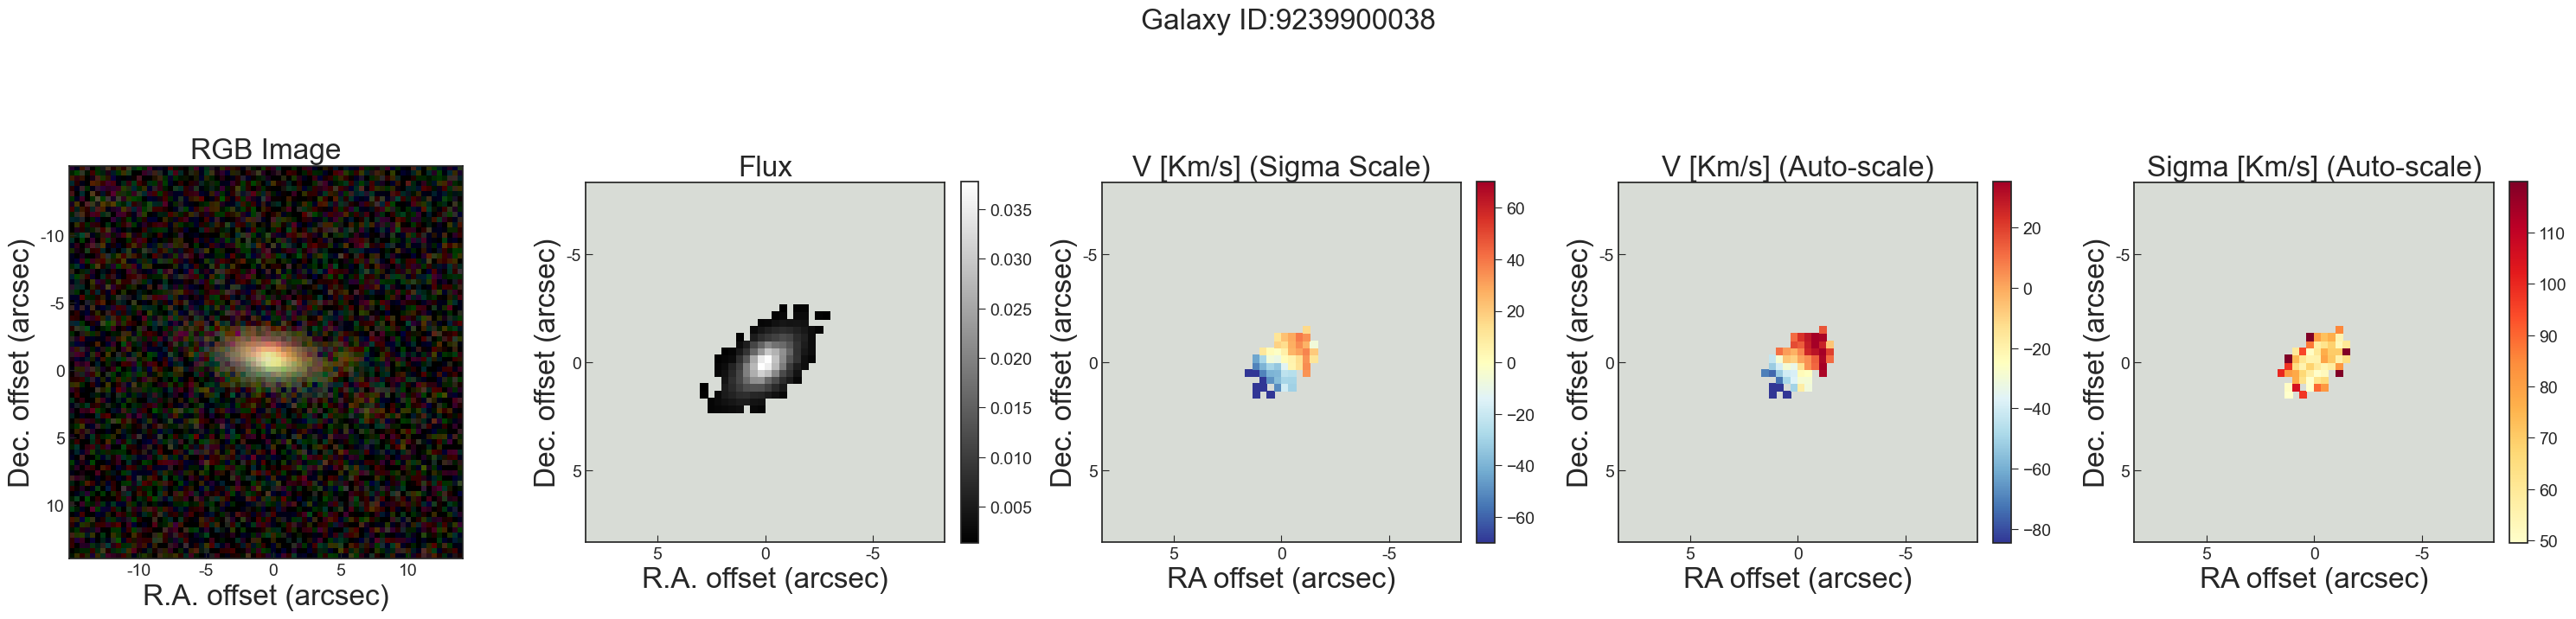

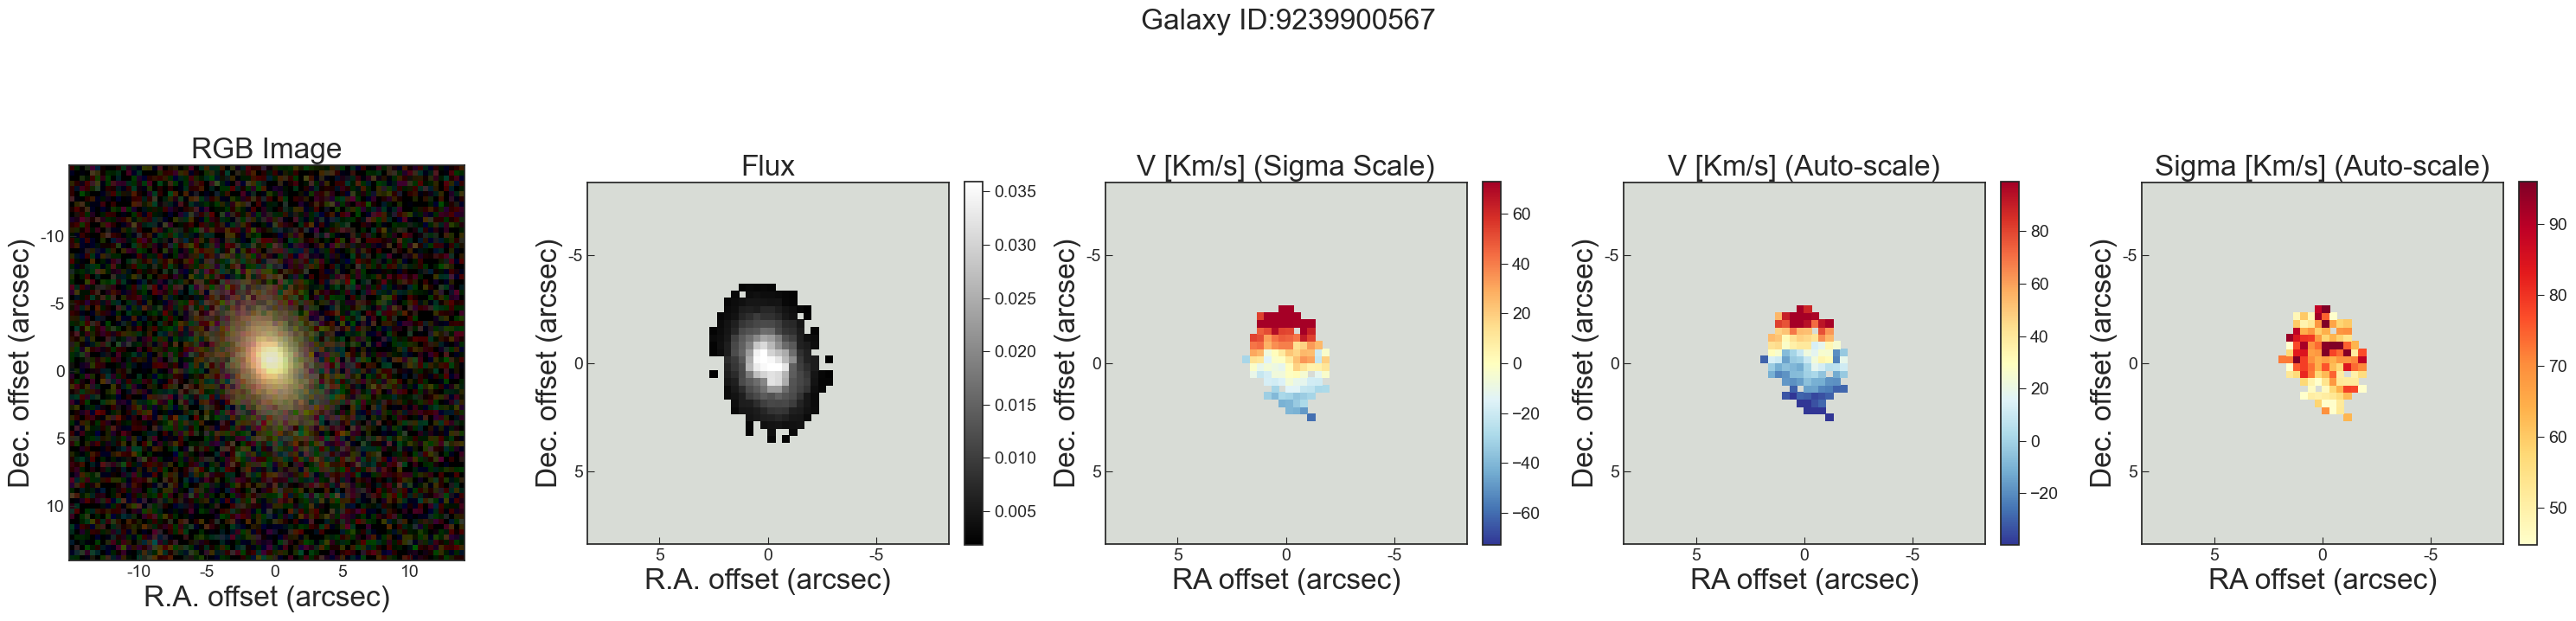

In [18]:
pp = PdfPages('homer1.pdf')

for i in range(0,np.size(CATID_TO_RUN)):

    catid_use = str(CATID_TO_RUN[i])
    if catid_use == '209613':
        continue
    a  = np.where(CATID_TO_RUN[i] == CATID_EXT)
    
    idx = a[0][0]
    
    CATID_USE = CATID[idx]
    
    sami_file_name = FILENAME[idx]  
    s = str(sami_file_name)
    s = s.strip()
    num = s.find('_')
    l = len(s)
    s = 'C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments\\' + \
    s[:num] + '_blue_red' + s[num:l-8] + '_kinematicsM2'+ s[l-8:-3]
    filename = s

    data = fits.open(filename)
    # open the velocity & error & snr
    
    vel = data['VEL'].data
    FLUX = data['FLUX'].data
    vel_err = data['VEL_ERR'].data
    sig = data['SIG'].data
    sig_err = data['SIG_ERR'].data
    qc = data['QC'].data
    snr = qc[:,:,3]

    # find where the conditions are met and filter out bad values

    centre = vel[22:28,22:28]
    median = np.nanmedian(centre)
    vel = vel - median
    
    vel_3sigmax = np.nanmean(vel) + 3*np.nanstd(vel)
    vel_3sigmin = np.nanmean(vel) - 3*np.nanstd(vel)
    sig_3sigmax = np.nanmean(sig) + 3*np.nanstd(sig)
    
    a = np.where((vel_err <= 30) & (snr >= 3) & (sig > 35) & (sig_err < sig*0.1 +25) & \
    (vel < vel_3sigmax) & (vel > vel_3sigmin) & (sig < sig_3sigmax) , 1, np.NaN)  
    vel = np.multiply(vel,a)
    sig = np.multiply(sig,a)
    
    
#     SIGMA_SCALE = np.nanpercentile(sig)
    SIGMA_SCALE = sigma_re_vals[i]
    
#     print(SIGMA_SCALE)
    
#     if not SIGMA_SCALE:
#         SIGMA_SCALE = 1.5*np.nanpercentile(vel,95)
    
    fig, axs = plt.subplots(1,5, figsize = (30, 8))
    fig.suptitle('Galaxy ID:' + str(CATID_USE) , fontsize=24)
    
    img_file_name = 'SAMI DATA/kids_imaging/' + str(CATID_USE) + '_rgb.png'
    
    fits_file_name = 'SAMI DATA/02_sdss_clusters/' + str(CATID_USE) + '_sdss_60.fits'

    try:
        img = mpimg.imread(img_file_name)
        img = img[75:225,75:225]
        z = 2
            
    except:
        print('not in kids, trying sdss')
        z = 0
        pass
    
    if z < 1:
        
        try:
            hdul_img = fits.open(fits_file_name)

            forCasting = np.float_()

            g = hdul_img[1].data
            r = hdul_img[2].data
            i = hdul_img[3].data

            g = np.array(g,forCasting)
            r = np.array(r,forCasting)
            i = np.array(i,forCasting)

            g = g[0:152, 0:152]
            r = r[0:152, 0:152]
            i = i[0:152, 0:152]

            g = g[38:114, 38:114]
            r = r[38:114, 38:114]
            i = i[38:114, 38:114]

            stretch = SqrtStretch() 

            g = stretch(g)
            r = stretch(r)
            i = stretch(i)

            rgb_default = make_lupton_rgb(i ,r ,g, Q= 1, stretch = 1)
    #         img = np.swapaxes(rgb_default,0,1)
            img = rgb_default

        except:
            print('couldnt find in either')
            img = mpimg.imread('SAMI DATA/02_sdss_clusters/No_image_available.png')
    
    ab = np.shape(img)
    inc = round(ab[0]/6)
    img = np.rot90(img)
    I = axs[0].imshow(img)
    axs[0].set_title('RGB Image', fontsize = 24)
    axs[0].set_xlabel('R.A. offset (arcsec)', fontsize = 24)
    axs[0].set_ylabel('Dec. offset (arcsec)', fontsize = 24)
    axs[0].set_aspect('equal', 'box')
    axs[0].set_facecolor('xkcd:light grey')
    axs[0].set_xticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_xticklabels([-10, -5, 0, 5, 10])
    axs[0].set_yticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_yticklabels([-10, -5, 0, 5, 10])
    axs[0].tick_params(direction = 'in')
   
    F = axs[1].pcolor(FLUX, cmap = 'gray')
    axs[1].set_title('Flux', fontsize = 24)
    axs[1].set_xlabel('R.A. offset (arcsec)', fontsize = 24)
    axs[1].set_ylabel('Dec. offset (arcsec)', fontsize = 24)
    fig.colorbar(F, ax=axs[1], fraction=0.046, pad=0.04)
    axs[1].set_aspect('equal', 'box')
    axs[1].set_facecolor('xkcd:light grey')
    axs[1].set_xticks([10, 25, 40])
    axs[1].set_xticklabels([5, 0, -5])
    axs[1].set_yticks([10, 25, 40])
    axs[1].set_yticklabels([5, 0, -5])
    axs[1].tick_params(direction = 'in')
    
    D = axs[2].pcolor(vel, cmap= 'RdYlBu_r', vmax = SIGMA_SCALE, vmin = -SIGMA_SCALE)
    axs[2].set_title('V [Km/s] (Sigma Scale)', fontsize = 24)
    axs[2].set_xlabel('RA offset (arcsec)', fontsize = 24)
    axs[2].set_ylabel('Dec. offset (arcsec)', fontsize = 24)
    fig.colorbar(D, ax=axs[2], fraction=0.046, pad=0.04)
    axs[2].set_aspect('equal', 'box')
    axs[2].set_facecolor('xkcd:light grey')
    axs[2].set_xticks([10, 25, 40])
    axs[2].set_xticklabels([5, 0, -5])
    axs[2].set_yticks([10, 25, 40])
    axs[2].set_yticklabels([5, 0, -5])
    axs[2].tick_params(direction = 'in')
    
    D2 = axs[3].pcolor(vel, cmap= 'RdYlBu_r', vmax = np.nanpercentile(vel,95),
                       vmin = np.nanpercentile(vel,5))
    axs[3].set_title('V [Km/s] (Auto-scale)', fontsize = 24)
    axs[3].set_xlabel('RA offset (arcsec)', fontsize = 24)
    axs[3].set_ylabel('Dec. offset (arcsec)', fontsize = 24)
    fig.colorbar(D2, ax=axs[3], fraction=0.046, pad=0.04)
    axs[3].set_aspect('equal', 'box')
    axs[3].set_facecolor('xkcd:light grey')
    axs[3].set_xticks([10, 25, 40])
    axs[3].set_xticklabels([5, 0, -5])
    axs[3].set_yticks([10, 25, 40])
    axs[3].set_yticklabels([5, 0, -5])
    axs[3].tick_params(direction = 'in')

    V = axs[4].pcolor(sig, cmap= 'YlOrRd', vmin = np.nanpercentile(sig, 5), vmax = np.nanpercentile(sig, 95))
    axs[4].set_title('Sigma [Km/s] (Auto-scale)', fontsize = 24)
    axs[4].set_xlabel('RA offset (arcsec)', fontsize = 24)
    axs[4].set_ylabel('Dec. offset (arcsec)', fontsize = 24)
    axs[4].set_aspect('equal', 'box')
    fig.colorbar(V, ax=axs[4], fraction=0.046, pad=0.04)
    axs[4].set_facecolor('xkcd:light grey')
    axs[4].set_xticks([10, 25, 40])
    axs[4].set_xticklabels([5, 0, -5])
    axs[4].set_yticks([10, 25, 40])
    axs[4].set_yticklabels([5, 0, -5])
    axs[4].tick_params(direction = 'in')
    
    plt.tight_layout()
    os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project')
    pp.savefig()
    
pp.close()



In [103]:
SIGMA_SCALE

array([72.900566, 72.900566], dtype=float32)

In [ ]:
np.nanmean(SIGMA_RE)

In [93]:
catid_1

'6821'

In [96]:
str(CATID[0])

'6821'

In [104]:
np.nanpercentile(vel,95)

21.200333658514197

In [40]:
string = 'string'
string[:-1]

'strin'

In [ ]:
%%time
#Open slices and select good quality spaxels by applying limits (ignore errors)#

##unlabelled NORs - make loops of 5 or 10 per page for ease
pp = PdfPages('unlabelled_NOR_attempt1.pdf')

for a in range (0,np.size(catids)):
    os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments')
    data_folder = Path()
    file_to_open = data_folder / SAMI_FITS[a]
    hdul = fits.open(file_to_open)
    FLUX = hdul[1].data
    VMAP = hdul[3].data
    VEL_ERR = hdul[4].data
    SIG = hdul[5].data
    SIG_ERR = hdul[6].data    
    QC = hdul[8].data
    SNR = QC[:,:,3]
    FLUX_GOOD = np.swapaxes(FLUX,0,1)

    
    a = np.where((VEL_ERR <= 30) & (SNR >= 3) & (SIG_ERR < SIG*0.1 +25), 1, np.NaN)
    vel = np.multiply(VMAP,a)
    sig = np.multiply(SIG,a)
    
    VMAP_CENTRE = vel[23:26,23:26]
    MEDIAN = np.nanmedian(VMAP_CENTRE)
    vel = vel - MEDIAN
    
    CATID1 = int(hdul[0].header[14])
    x = np.where(CATID == CATID1)
    y = np.nanmax(x)
    SIGMA_SCALE = SIGMA_RE[y]
    
    if np.isnan(SIGMA_SCALE) == True:
        SIGMA_SCALE = np.nanpercentile(VMAP_GOOD,95)
    else:
        SIGMA_SCALE = SIGMA_SCALE
    
    fig, axs = plt.subplots(1,5)
    fig.suptitle('Galaxy ID:' + str(CATID1) , fontsize=16)
    
#     Add an if statement and unzip the file with a similar file name setup
    
    img_file_name = 'kids_imaging/' + str(CATID1) + '_rgb.png'
    
    fits_file_name = str(CATID1) + '_sdss_60.fits'
    
    #Add a try except block or similar in here to generate image from correct source
    
    if CATID1 < 4e6:
    
        try:
            with ZipFile('kids_imaging.zip') as myzip:
                with myzip.open(img_file_name) as myfile:
                    img = mpimg.imread(img_file_name)
                    img = img[75:225,75:225]
        except:
            img = mpimg.imread('No_image_available.png')
            
    else:
        try:
            os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\02_sdss_clusters')
            hdul_img = fits.open(fits_file_name)
            
            forCasting = np.float_()

            g = hdul_img[1].data
            r = hdul_img[2].data
            i = hdul_img[3].data
            
            g = np.array(g,forCasting)
            r = np.array(r,forCasting)
            i = np.array(i,forCasting)

            g = g[0:152, 0:152]
            r = r[0:152, 0:152]
            i = i[0:152, 0:152]

            g = g[38:114, 38:114]
            r = r[38:114, 38:114]
            i = i[38:114, 38:114]

            stretch = SqrtStretch() 

            g = stretch(g)
            r = stretch(r)
            i = stretch(i)

            rgb_default = make_lupton_rgb(i ,r ,g, Q= 1, stretch = 1)
#             img = np.swapaxes(rgb_default,0,1)
            img = rgb_default
                  
        except:
            img = mpimg.imread('No_image_available.png')
    
    ab = np.shape(img)
    inc = round(ab[0]/6)
    
    I = axs[0].imshow(img)
    axs[0].set_title('RGB Image', fontsize = 16)
    axs[0].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
    axs[0].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    axs[0].set_aspect('equal', 'box')
    axs[0].set_facecolor('xkcd:light grey')
    axs[0].set_xticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_xticklabels([-10, -5, 0, 5, 10])
    axs[0].set_yticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_yticklabels([-10, -5, 0, 5, 10])
    axs[0].tick_params(direction = 'in')
   
    F = axs[1].pcolor(FLUX, cmap = 'gray')
    axs[1].set_title('Flux', fontsize = 16)
    axs[1].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
    axs[1].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(F, ax=axs[1], fraction=0.046, pad=0.04)
    axs[1].set_aspect('equal', 'box')
    axs[1].set_facecolor('xkcd:light grey')
    axs[1].set_xticks([10, 25, 40])
    axs[1].set_xticklabels([5, 0, -5])
    axs[1].set_yticks([10, 25, 40])
    axs[1].set_yticklabels([5, 0, -5])
    axs[1].tick_params(direction = 'in')
    
    D = axs[2].pcolor(vel, cmap= 'RdYlBu_r', vmax = SIGMA_SCALE, vmin = -SIGMA_SCALE)
    axs[2].set_title('V [Km/s] (Sigma Scale)', fontsize = 16)
    axs[2].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[2].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(D, ax=axs[2], fraction=0.046, pad=0.04)
    axs[2].set_aspect('equal', 'box')
    axs[2].set_facecolor('xkcd:light grey')
    axs[2].set_xticks([10, 25, 40])
    axs[2].set_xticklabels([5, 0, -5])
    axs[2].set_yticks([10, 25, 40])
    axs[2].set_yticklabels([5, 0, -5])
    axs[2].tick_params(direction = 'in')
    
    D2 = axs[3].pcolor(vel, cmap= 'RdYlBu_r', vmax = np.nanpercentile(vel,95),
                       vmin = np.nanpercentile(vel,5))
    axs[3].set_title('V [Km/s] (Auto-scale)', fontsize = 16)
    axs[3].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[3].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(D2, ax=axs[3], fraction=0.046, pad=0.04)
    axs[3].set_aspect('equal', 'box')
    axs[3].set_facecolor('xkcd:light grey')
    axs[3].set_xticks([10, 25, 40])
    axs[3].set_xticklabels([5, 0, -5])
    axs[3].set_yticks([10, 25, 40])
    axs[3].set_yticklabels([5, 0, -5])
    axs[3].tick_params(direction = 'in')

    V = axs[4].pcolor(sig, cmap= 'YlOrRd', vmin = np.nanpercentile(sig, 5), vmax = np.nanpercentile(sig, 95))
    axs[4].set_title('Sigma [Km/s] (Auto-scale)', fontsize = 16)
    axs[4].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[4].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    axs[4].set_aspect('equal', 'box')
    fig.colorbar(V, ax=axs[4], fraction=0.046, pad=0.04)
    axs[4].set_facecolor('xkcd:light grey')
    axs[4].set_xticks([10, 25, 40])
    axs[4].set_xticklabels([5, 0, -5])
    axs[4].set_yticks([10, 25, 40])
    axs[4].set_yticklabels([5, 0, -5])
    axs[4].tick_params(direction = 'in')
    
    plt.tight_layout()
    os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project')
    pp.savefig()
    
pp.close()
